In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd

In [2]:
rule_x = lambda x,y,c: np.sin(x**2 - y**2 + c)
rule_y = lambda x,y,c: np.cos(2*x*y + c)

In [3]:
def boxInit(trajectory_number: int, ranges: tuple[float]) -> np.array:
    x,y = np.zeros(trajectory_number), np.zeros(trajectory_number)

    x_min, x_max, y_min, y_max = ranges
    total_x_range = x_max - x_min
    total_y_range = y_max - y_min
    
    k = trajectory_number//4
    x[:k], y[:k] = x_min+total_x_range*np.random.rand(k), y_max * np.ones(k)
    x[3*k:], y[3*k:] = x_min+total_x_range*np.random.rand(k), y_min*np.ones(k)
    x[k:2*k], y[k:2*k] = x_max*np.ones(k), y_min+total_y_range*np.random.rand(k)
    x[2*k:3*k], y[2*k:3*k] = x_min*np.ones(k), y_min+total_y_range*np.random.rand(k)
    return x,y

def randInit(trajectory_number: int, ranges: tuple[float]) -> np.array:
    x_min, x_max, y_min, y_max = ranges
    total_x_range = x_max - x_min
    total_y_range = y_max - y_min

    return x_min+total_x_range*np.random.rand(trajectory_number), y_min+total_y_range*np.random.rand(trajectory_number)

def calculateOrbitTrajectories(_trajectories: list | None, trajectory_length: int, trajectory_number: int, c1: float, c2: float, ranges: tuple, start_method: str):
    if _trajectories is None:
        _trajectories = list()
    x,y = np.zeros((trajectory_length,trajectory_number)), np.zeros((trajectory_length,trajectory_number))
    if start_method == "box":
        x[0], y[0] = boxInit(trajectory_number, ranges)
    else:
        x[0], y[0] = randInit(trajectory_number, ranges)

    for i in range(trajectory_length-1):
        new_x, new_y = rule_x(x[i], y[i], c1), rule_y(x[i], y[i], c2)
        x[i+1] = new_x
        y[i+1] = new_y
    for _x,_y in zip(x.T,y.T):
        _trajectories.append((_x,_y))
    return _trajectories

## Fixed Parameter Plot

In [68]:
def plotTrajectory(ax, trajectory_number: int, c1: float, c2: float, simulation_ranges: tuple | None = None, plot_ranges: tuple | None = None, methods: list[tuple] | tuple[tuple] = [("random",50),("random",100),("random",200)]):
    # Set Default Ranges to -1:1 on both the x and the y axis
    if simulation_ranges is None:
        simulation_ranges = (-1,1,-1,1)
    if plot_ranges is None:
        plot_ranges = simulation_ranges

    # Generate some short and long trajectories
    trajectories = []
    for start_method,trajectory_length in methods:
        calculateOrbitTrajectories(trajectories, trajectory_number = trajectory_number, trajectory_length = trajectory_length, c1 = c1, c2 = c2, ranges=simulation_ranges, start_method = start_method)

    # Stack all trajectories and do a histogram plot
    x = np.hstack([trajectory[0] for trajectory in trajectories])
    y = np.hstack([trajectory[1] for trajectory in trajectories])
    c = np.hstack( [np.linspace(0,1,len(trajectory[0])) for trajectory in trajectories] )

    data = np.stack((x, y, c), axis=-1)
    df = pd.DataFrame(data, columns=['x', 'y', 'color'])

    # Define the canvas
    size = 800
    canvas = ds.Canvas(plot_width=size, plot_height=size, x_range=plot_ranges[:2], y_range=plot_ranges[2:])

    # Aggregate the line segments
    agg = canvas.points(df, 'x', 'y', agg=ds.first('color'))

    # Shade the aggregated data

    img = tf.shade(agg,cmap=mpl.colormaps['turbo'], how='linear')
    img = tf.set_background(img,mpl.colormaps['turbo'](0)[:3])
    # Display the image using Matplotlib
    plt.pcolormesh(np.linspace(-1,1,size),np.linspace(-1,1,size),img.to_pil())
    # Set the aspect of the plot to be equal, limit accordingly and remove the axis
    ax.set_aspect('equal')
    ax.axis('off')

    return ax

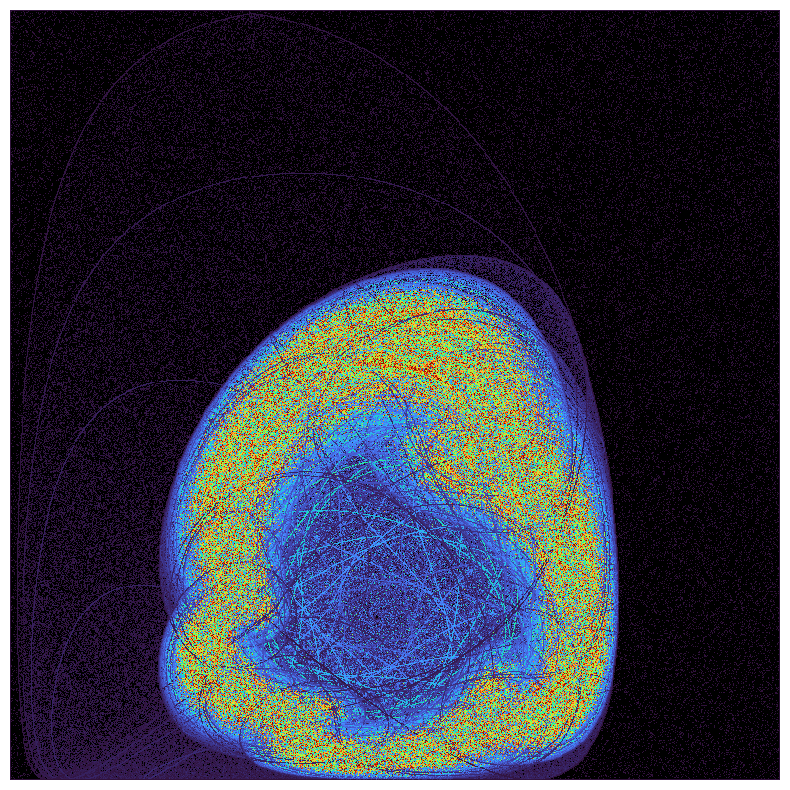

In [78]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

# Set the parameters for the system
c1,c2 = 3.52,1.01
x_min, x_max, y_min, y_max = -1,1,-1,1
N = 50000
plotTrajectory(ax, N, c1, c2, plot_ranges = (x_min,x_max,y_min,y_max), methods = [("box",150),("box",150),("box",150),("random",150),("random",250),("box",200)])
plt.savefig(f"{c1}_{c2}_x_{x_min}_{x_max}_y_{y_min}_{y_max}_N_{N}.png")

## Animation

Plot for c2 = 0.0
Plot for c2 = 0.0
Plot for c2 = 0.012591553721802777
Plot for c2 = 0.025183107443605555
Plot for c2 = 0.037774661165408334
Plot for c2 = 0.05036621488721111
Plot for c2 = 0.06295776860901389
Plot for c2 = 0.07554932233081667
Plot for c2 = 0.08814087605261944
Plot for c2 = 0.10073242977442222
Plot for c2 = 0.113323983496225
Plot for c2 = 0.12591553721802778
Plot for c2 = 0.13850709093983055
Plot for c2 = 0.15109864466163334
Plot for c2 = 0.1636901983834361
Plot for c2 = 0.1762817521052389
Plot for c2 = 0.18887330582704165
Plot for c2 = 0.20146485954884444
Plot for c2 = 0.21405641327064723
Plot for c2 = 0.22664796699245
Plot for c2 = 0.23923952071425278
Plot for c2 = 0.25183107443605557
Plot for c2 = 0.26442262815785833
Plot for c2 = 0.2770141818796611
Plot for c2 = 0.28960573560146385
Plot for c2 = 0.30219728932326667
Plot for c2 = 0.31478884304506943
Plot for c2 = 0.3273803967668722
Plot for c2 = 0.339971950488675
Plot for c2 = 0.3525635042104778
Plot for c2 = 0.36515

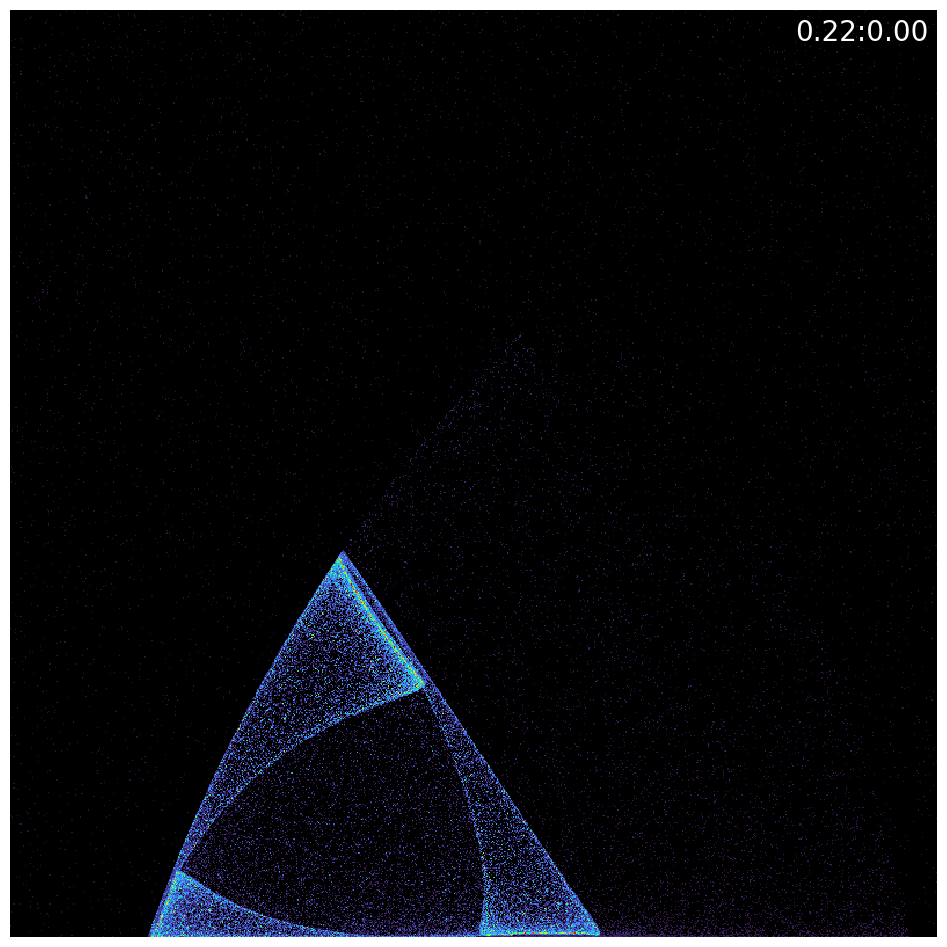

In [79]:
from matplotlib.animation import FuncAnimation

# Create a new figure and add a subplot
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.tight_layout()

# Set the parameters for the system
c1,c2 = 0.222, np.linspace(0,2*np.pi,500)
N = 2500

# Create a function that updates the plot for each value of c2
def update(c2):
    ax.clear()
    plotTrajectory(ax, N, c1, c2)
    ax.text(0.99, 0.99, f"{c1:.2f}:{c2:.2f}", ha="right", va="top", fontsize=20, transform=ax.transAxes, color="white")
    print(f"Plot for c2 = {c2}")

# Create the animation
ani = FuncAnimation(fig, update, frames=c2, interval=100)
ani.save(f"attractor_{c1}.mp4", fps=30)